In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

# Functions

In [17]:
def plot_training(df):
    min_loss = np.argmax(df["validation_f1"])
    min_epoch = df["epoch"][min_loss]

    print(f"**\nMelhor modelo:\n{df.loc[min_epoch - 1, :]}\n**\n")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(14, 12), sharex=True, sharey=False)
    sns.lineplot(data=df, x="epoch", y="validation_f1", label="validation", ax=ax1)
    sns.lineplot(data=df, x="epoch", y="train_f1", label="train", ax=ax1)
    ax1.set_ylabel("Validation")
    ax1.set_title("Train vs Validation F1-Score")
    ax1.axvline(min_epoch, 0, color="red", linestyle="dotted")

    sns.lineplot(data=df, x="epoch", y="validation_loss", label="validation", ax=ax2)
    sns.lineplot(data=df, x="epoch", y="train_loss", label="train", ax=ax2)

    ax2.set_ylabel("Loss")
    ax2.set_title("Train vs Validation Loss")
    ax2.axvline(min_epoch, 0, color="red", linestyle="dotted")
    ax2.set_ylim(0, 3)
    plt.show()

# Analysis

## `Mode 1` (sem data augmentation)

### Config

- epochs: 50
- learning_rate: 0.001
- batch_size: 32
- audio: mono, 16000 hz, normalization
- pipeline: extract mel spec -> extract wavelet -> concat output
- mel spec: hop_length 512, n_fft 1024, n_mels 128
- wavelet: "db4", level 3, "dwt"
- CNN model:
    - Conv2d (64 units, kernel 2x2, padding valid) + BatchNormalization2D + ReLU + MaxPool2d(kernel 2x2)
    - Conv2d (128 units, kernel 2x2, padding valid) + BatchNormalization2D + ReLU + MaxPool2d(kernel 2x2)
    - Conv2d (256 units, kernel 2x2, padding valid) + BatchNormalization2D + ReLU + MaxPool2d(kernel 2x2)
    - Flatten
    - Linear (3 units)

### Fold 0

**
Melhor modelo:
epoch              33.000000
train_f1            0.989684
train_loss          0.040007
validation_f1       0.601639
validation_loss     0.987769
Name: 32, dtype: float64
**



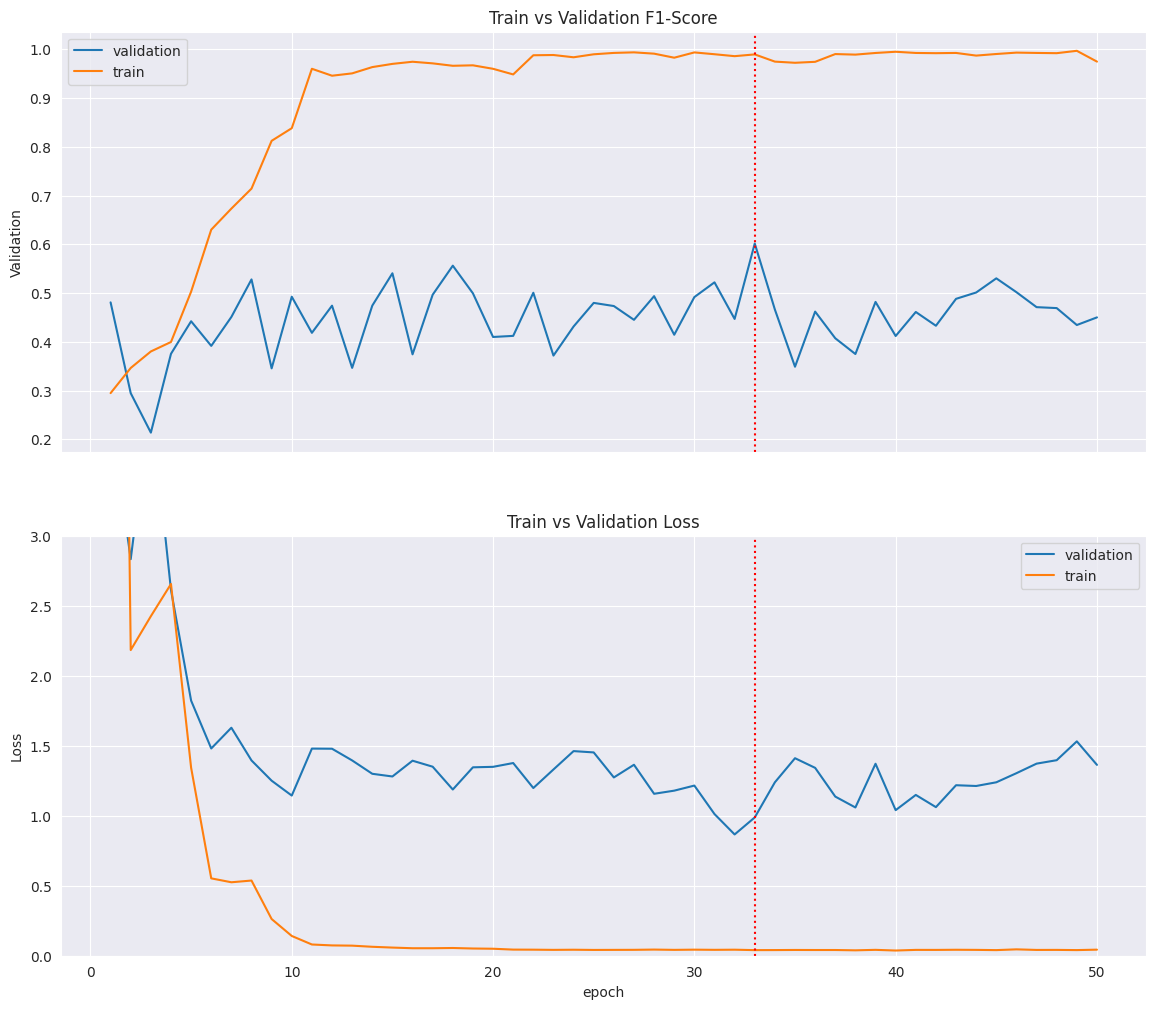

In [27]:
dataset_name = "propor2022"
logs_path = f"../logs/{dataset_name}/mode_1_sem_da"
fold = 0

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 1

**
Melhor modelo:
epoch              37.000000
train_f1            0.993464
train_loss          0.033909
validation_f1       0.561003
validation_loss     1.691963
Name: 36, dtype: float64
**



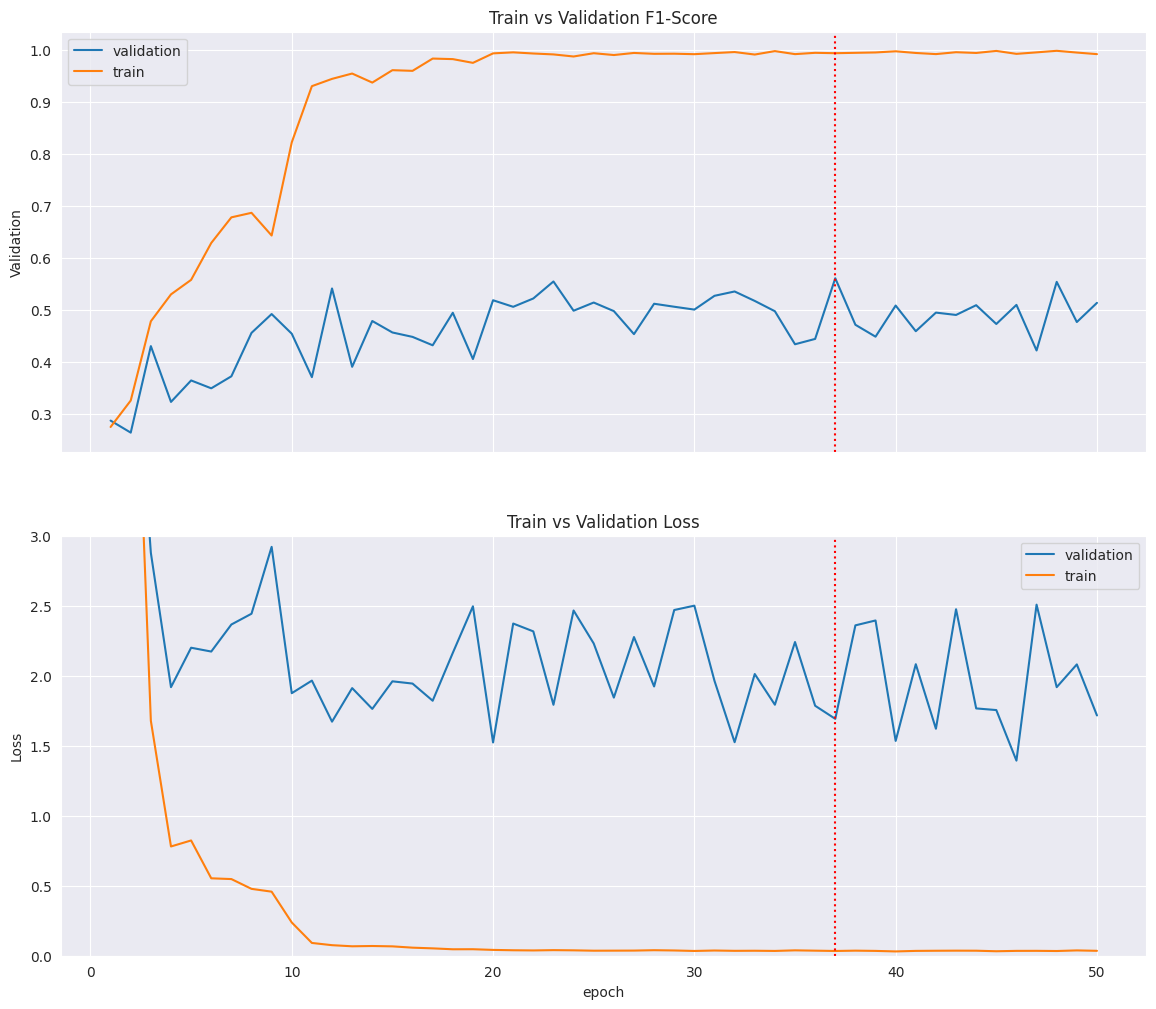

In [28]:
fold = 1

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 2

**
Melhor modelo:
epoch              21.000000
train_f1            0.994126
train_loss          0.020681
validation_f1       0.599347
validation_loss     2.374211
Name: 20, dtype: float64
**



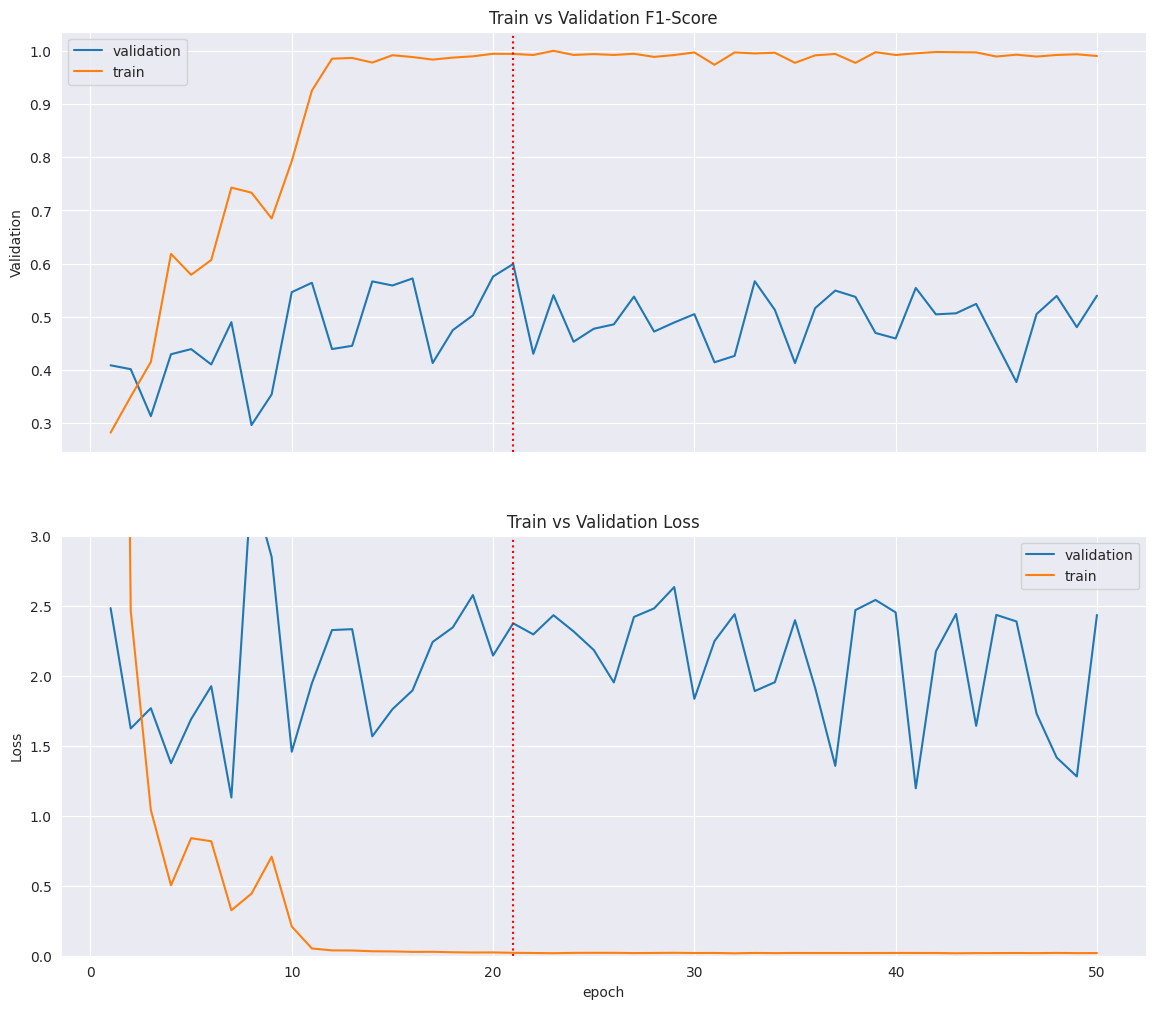

In [29]:
fold = 2

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 3

**
Melhor modelo:
epoch              50.000000
train_f1            0.962852
train_loss          0.079762
validation_f1       0.638716
validation_loss     0.665256
Name: 49, dtype: float64
**



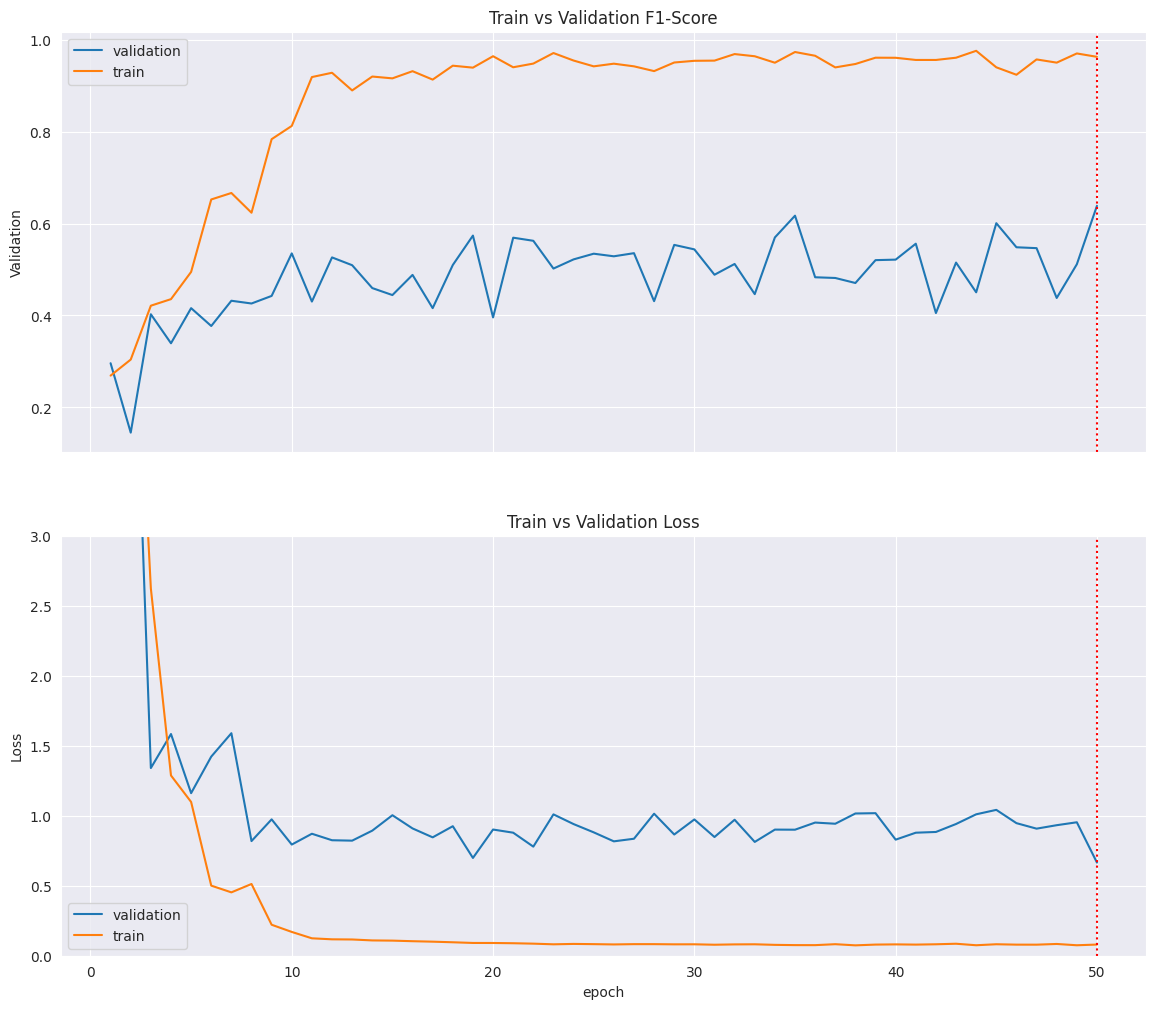

In [30]:
fold = 3

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 4

**
Melhor modelo:
epoch              23.000000
train_f1            0.984654
train_loss          0.042689
validation_f1       0.487396
validation_loss     0.984270
Name: 22, dtype: float64
**



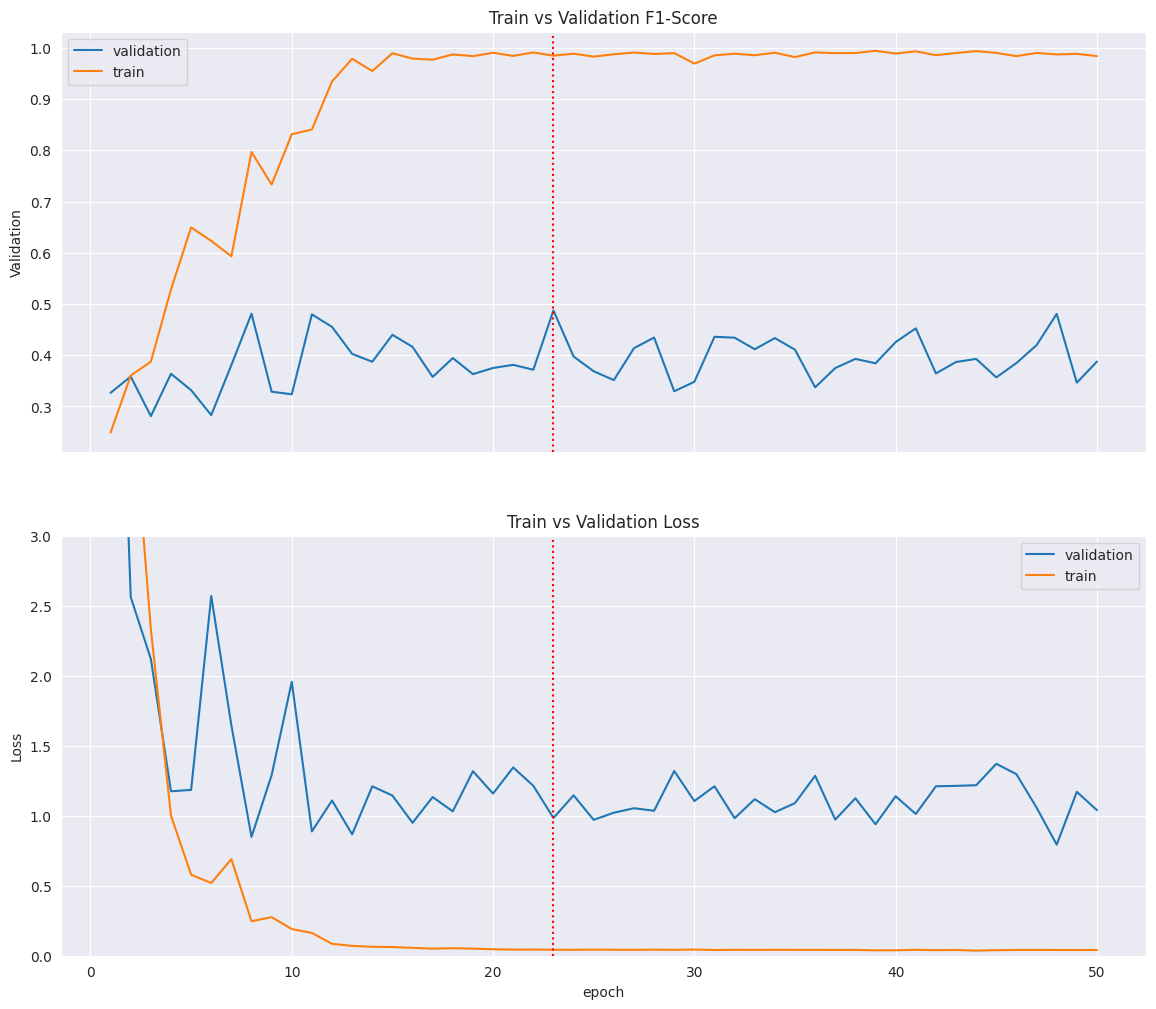

In [31]:
fold = 4

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

## `Mode 2` (sem data augmentation)

### Config

- epochs: 50
- learning_rate: 0.001
- batch_size: 32
- audio: mono, 16000 hz, normalization
- pipeline: extract wavelet -> extract mel spec -> concat n dimensions
- mel spec: hop_length 256, n_fft 512, n_mels 64
- wavelet: "db4", level 4, "dwt"
- Resnet18 model

### Fold 0

**
Melhor modelo:
epoch              54.000000
train_f1            1.000000
train_loss          0.000690
validation_f1       0.525463
validation_loss     1.657310
Name: 53, dtype: float64
**



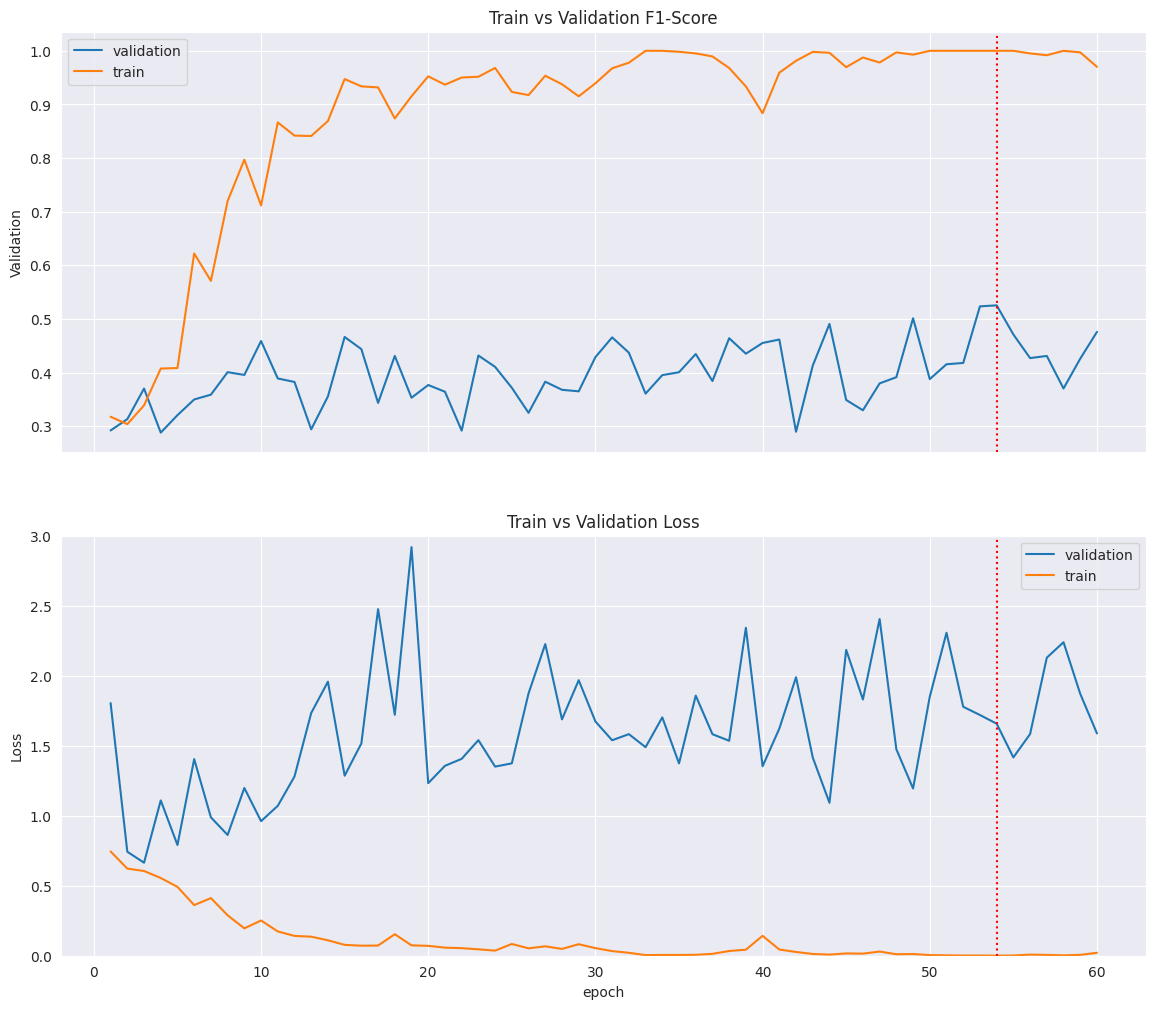

In [33]:
dataset_name = "propor2022"
logs_path = f"../logs/{dataset_name}/mode_2"
fold = 0

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 1

**
Melhor modelo:
epoch              28.000000
train_f1            0.981005
train_loss          0.017065
validation_f1       0.428787
validation_loss     1.590103
Name: 27, dtype: float64
**



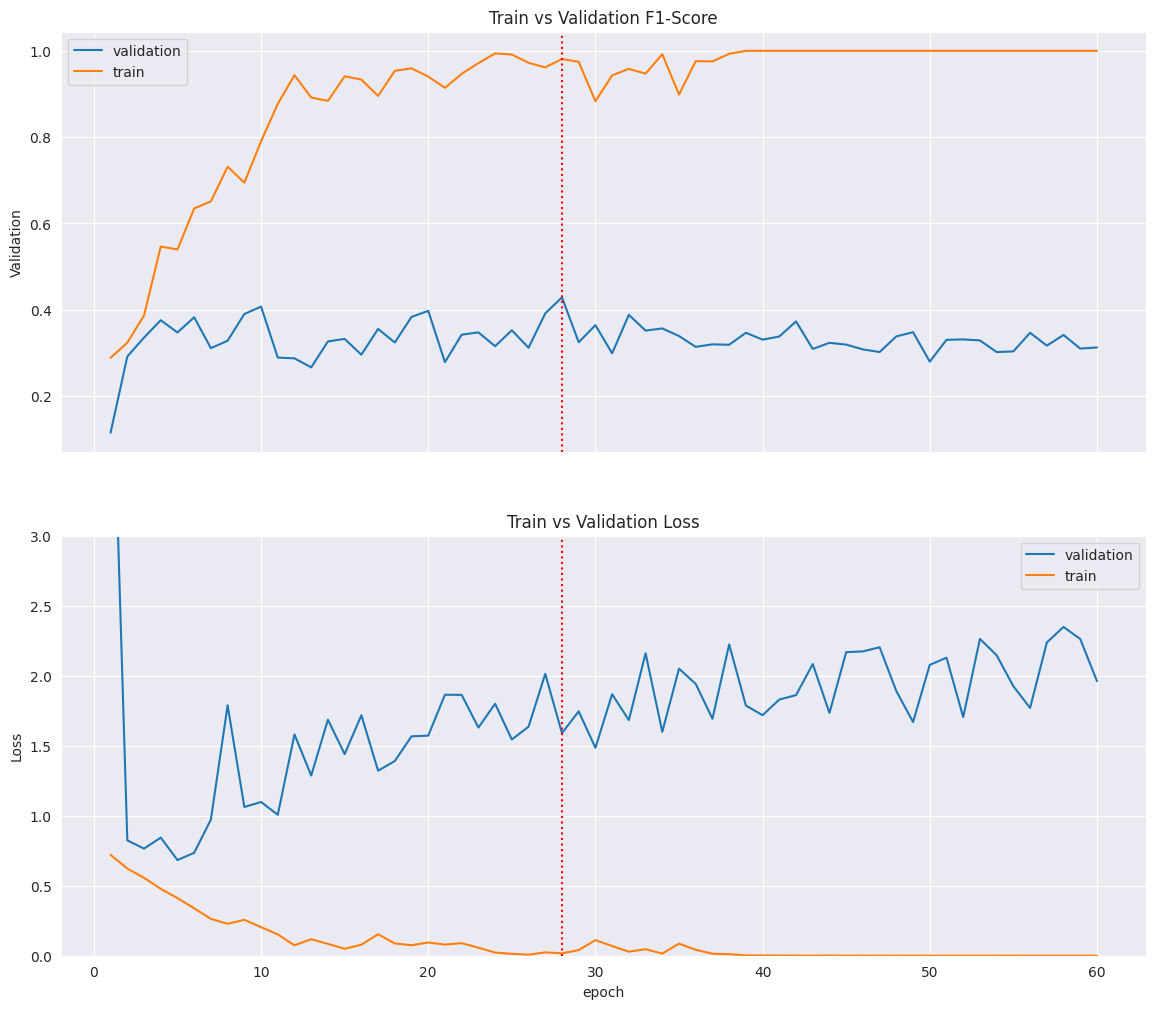

In [34]:
fold = 1

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 2

**
Melhor modelo:
epoch              28.000000
train_f1            0.922007
train_loss          0.087714
validation_f1       0.482310
validation_loss     1.193481
Name: 27, dtype: float64
**



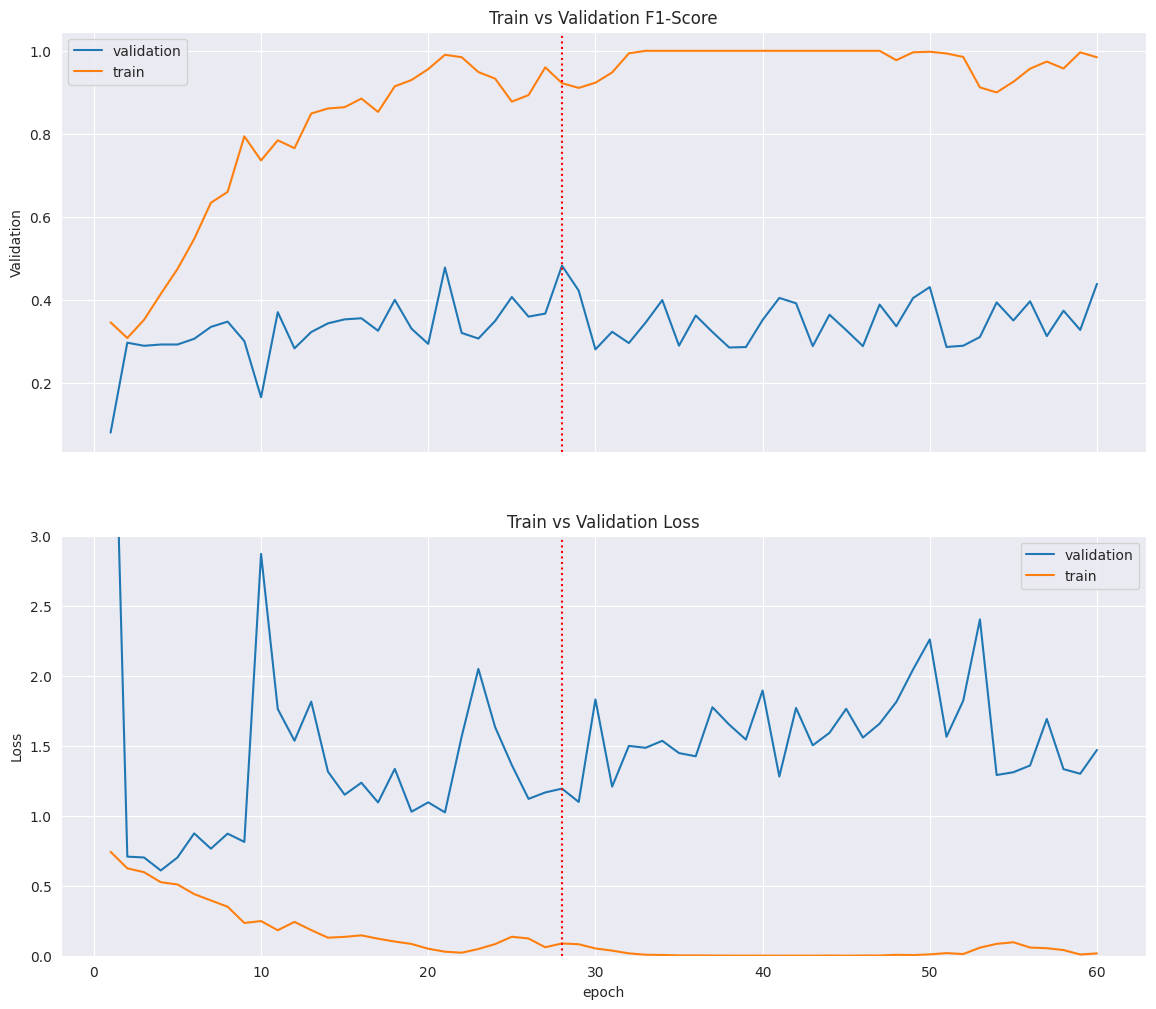

In [35]:
fold = 2

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 3

**
Melhor modelo:
epoch              44.000000
train_f1            0.997037
train_loss          0.003522
validation_f1       0.473704
validation_loss     1.876198
Name: 43, dtype: float64
**



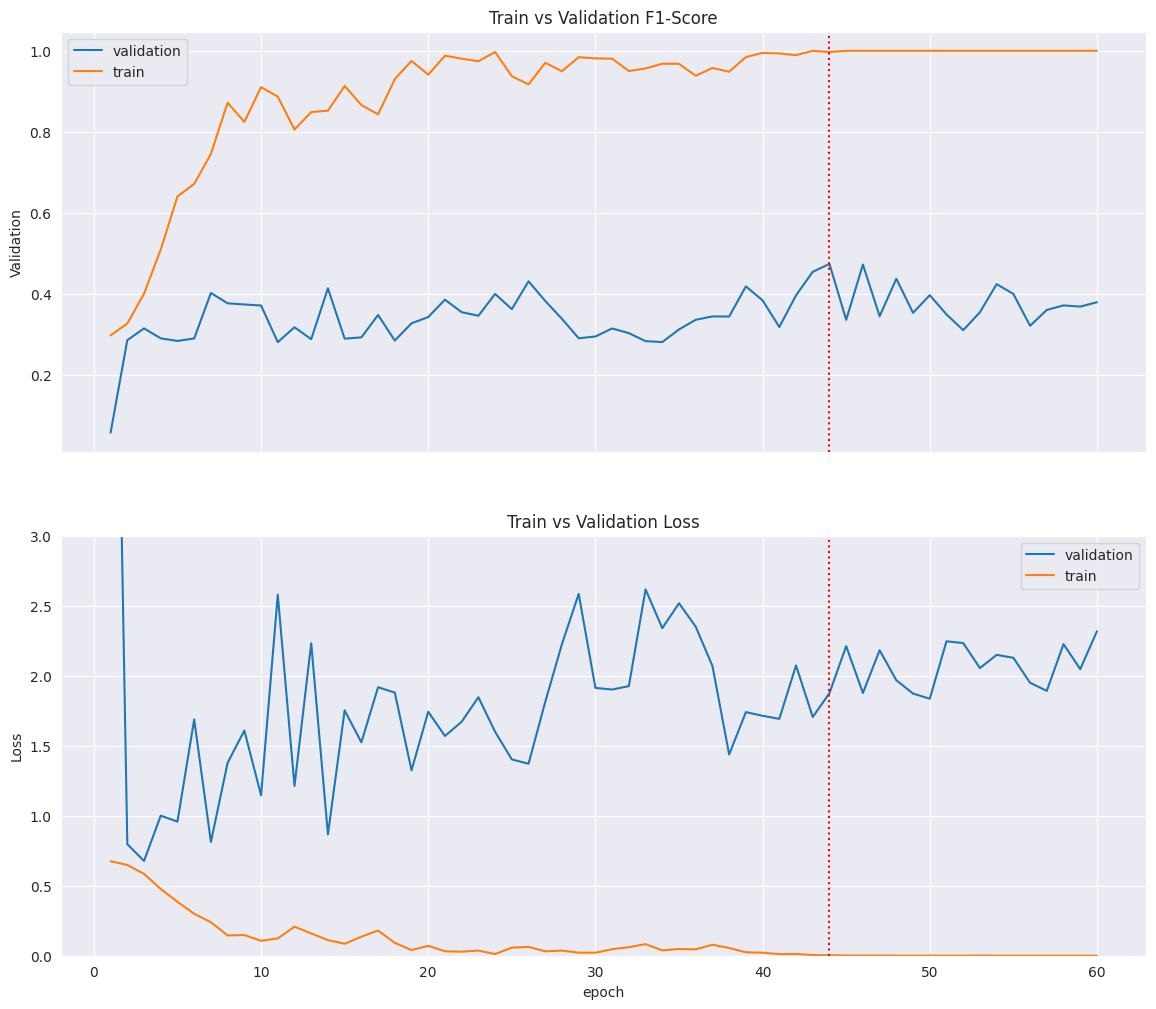

In [37]:
fold = 3

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 4

**
Melhor modelo:
epoch              44.000000
train_f1            0.971475
train_loss          0.016333
validation_f1       0.480112
validation_loss     1.338028
Name: 43, dtype: float64
**



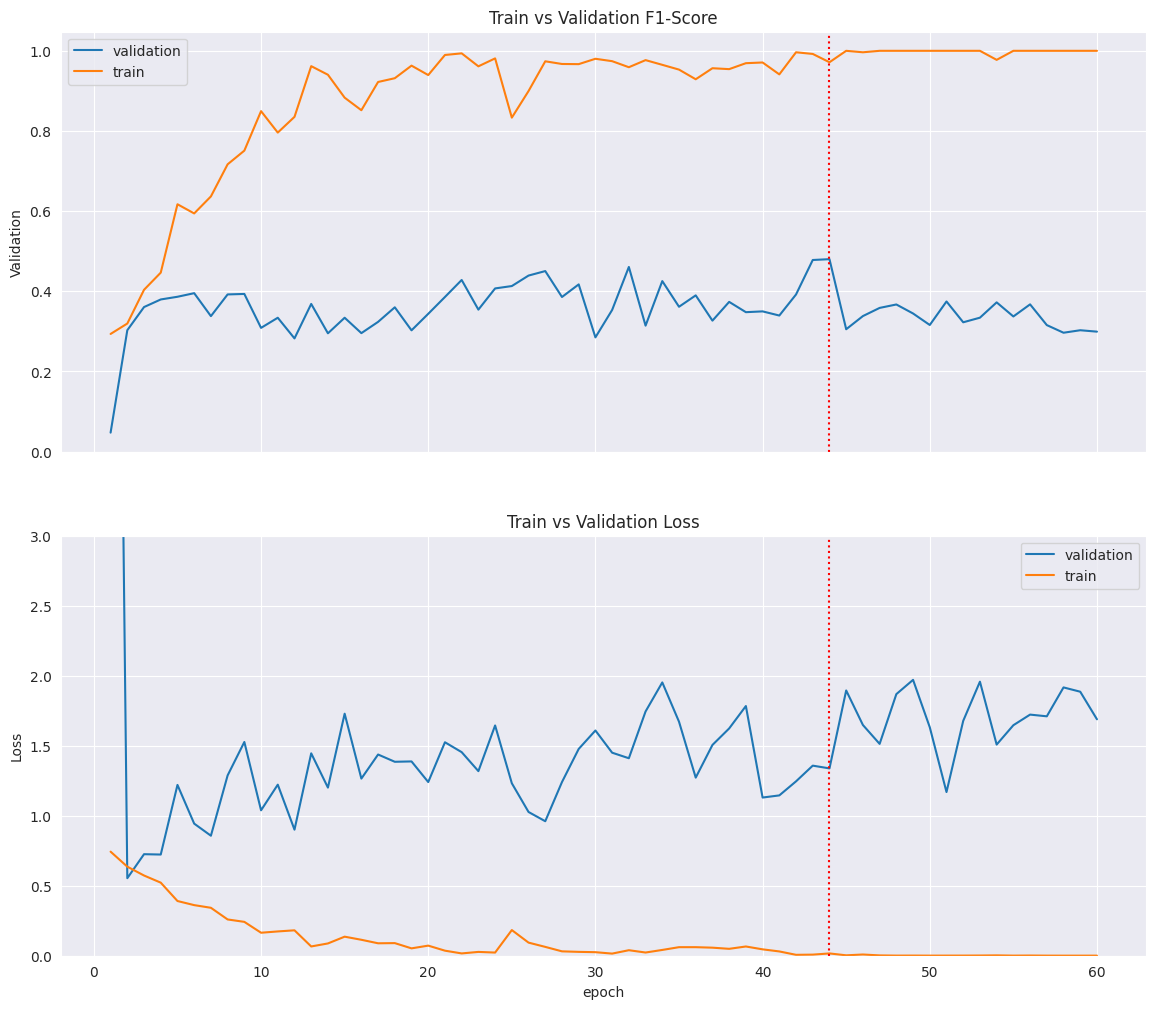

In [38]:
fold = 4

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

## `Mode 3` (sem data augmentation)

### Config

- epochs: 100
- learning_rate: 0.001
- batch_size: 32
- audio: mono, 16000 hz, normalization
- extraction features: "standard deviation", "kurtosis", "skewness"
- wavelet: "db4", level 4, "dwt"
- MLP model:
    - Linear (64 units) + BatchNormalization1D + ReLU
    - Linear (128 units) + BatchNormalization1D + ReLU
    - Linear (256 units) + BatchNormalization1D + ReLU
    - Linear (3 units)

### Fold 0

**
Melhor modelo:
epoch              99.000000
train_f1            0.761334
train_loss          0.315665
validation_f1       0.446636
validation_loss     0.688980
Name: 98, dtype: float64
**



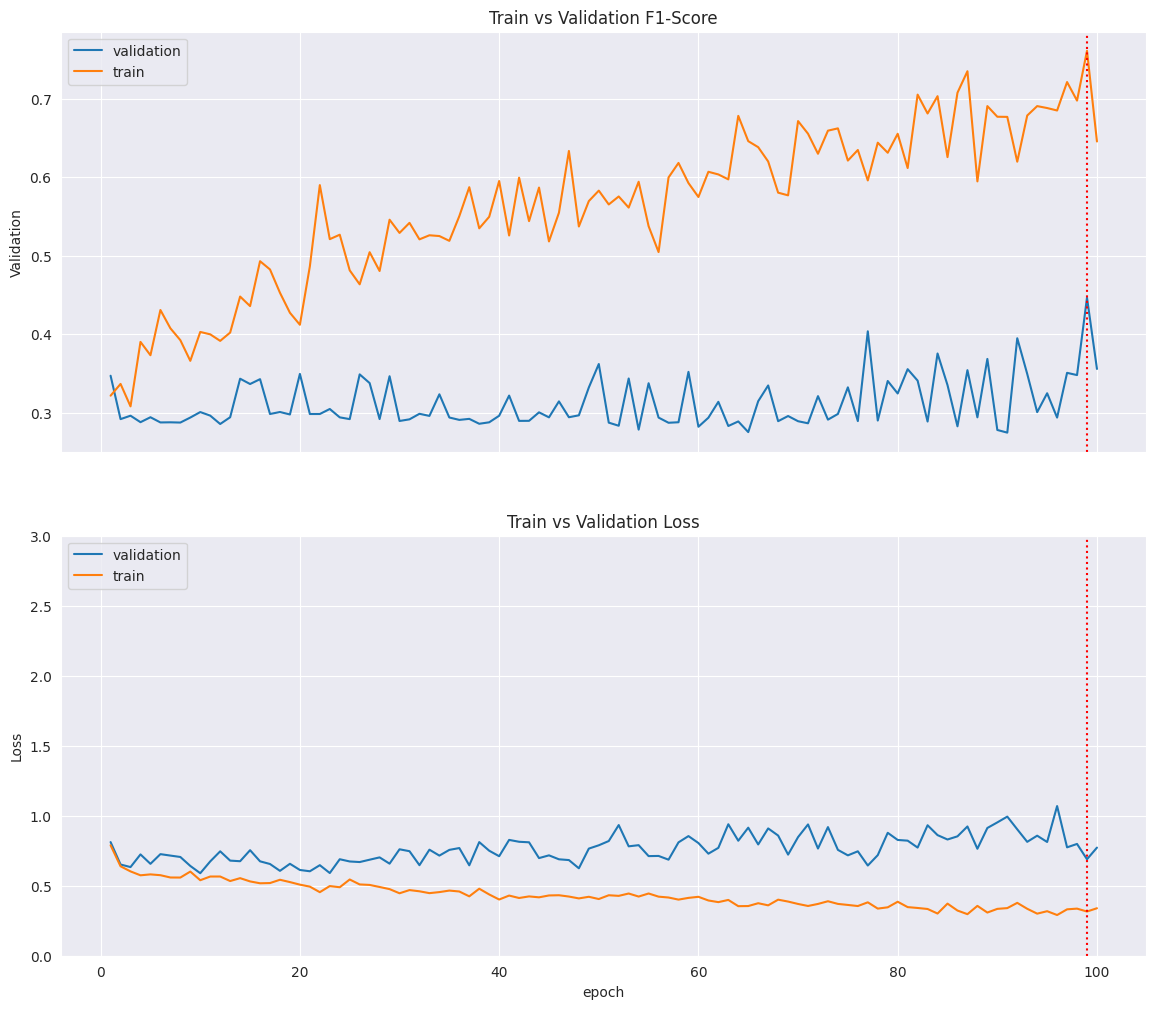

In [18]:
dataset_name = "propor2022"
logs_path = f"../logs/{dataset_name}/mode_3_sem_da"
fold = 0

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 1

**
Melhor modelo:
epoch              77.000000
train_f1            0.629141
train_loss          0.370385
validation_f1       0.534187
validation_loss     0.658430
Name: 76, dtype: float64
**



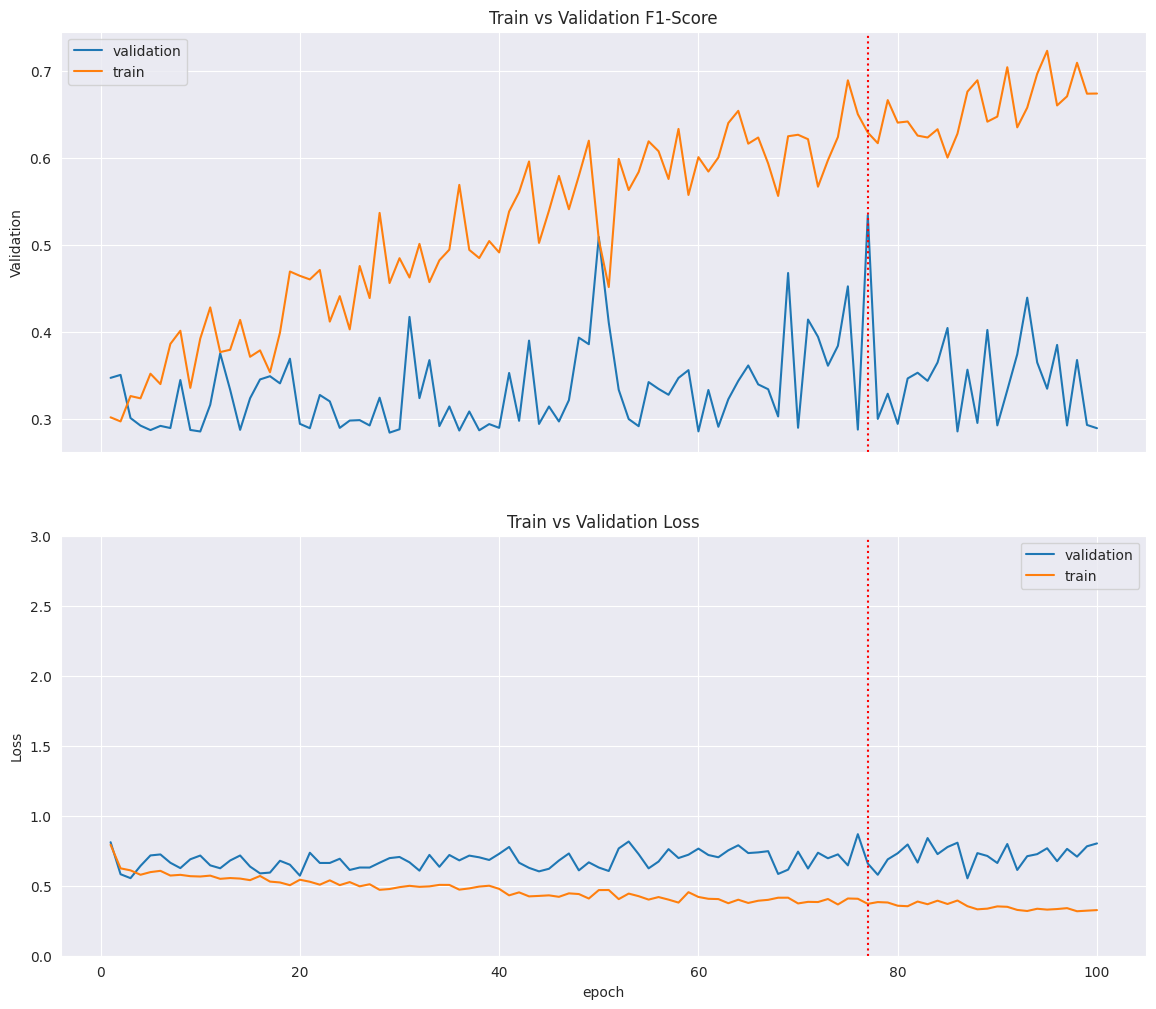

In [19]:
fold = 1

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 2

**
Melhor modelo:
epoch              31.000000
train_f1            0.431052
train_loss          0.496878
validation_f1       0.458630
validation_loss     0.634217
Name: 30, dtype: float64
**



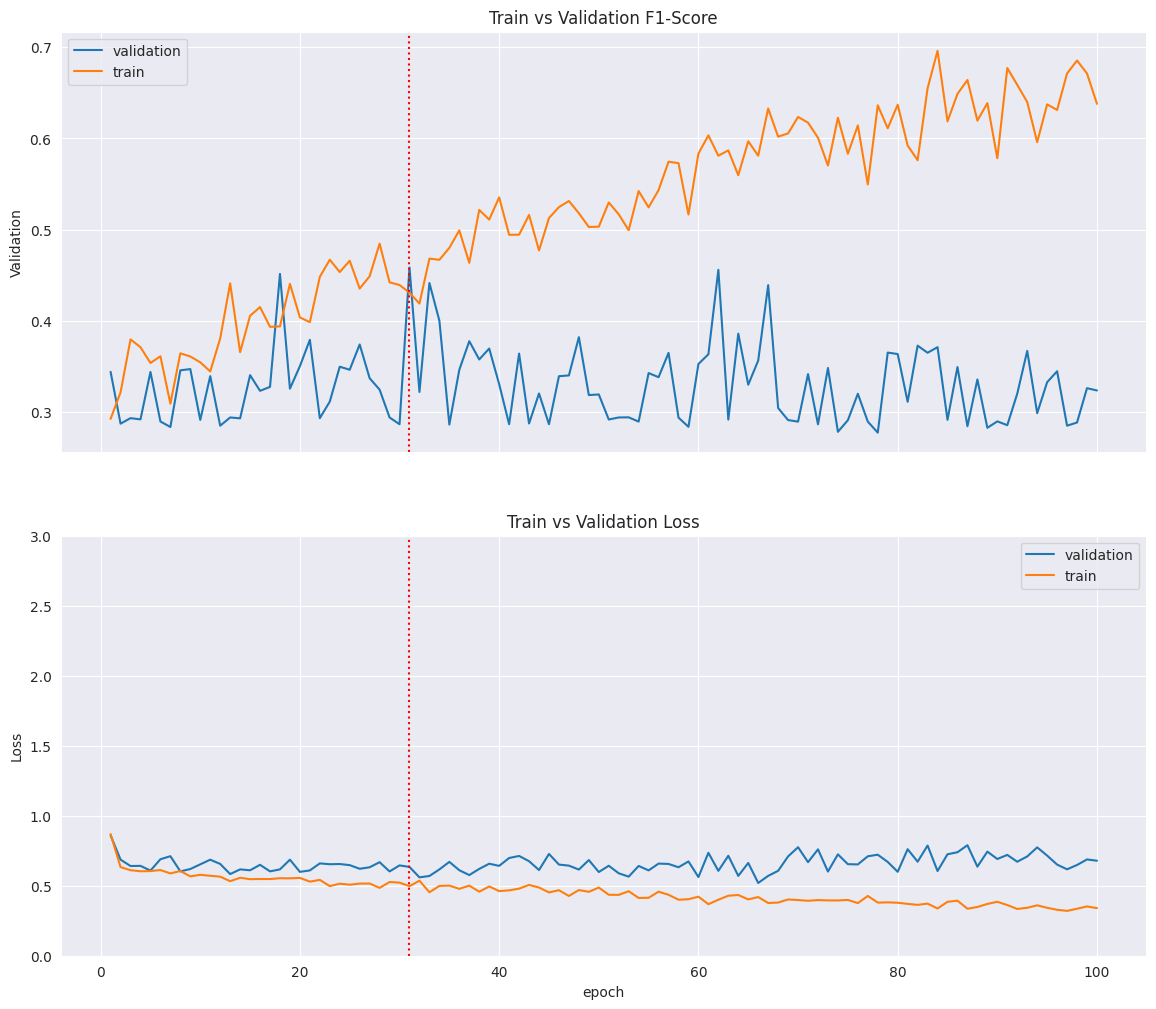

In [20]:
fold = 2

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 3

**
Melhor modelo:
epoch              93.000000
train_f1            0.621598
train_loss          0.393132
validation_f1       0.461743
validation_loss     0.627344
Name: 92, dtype: float64
**



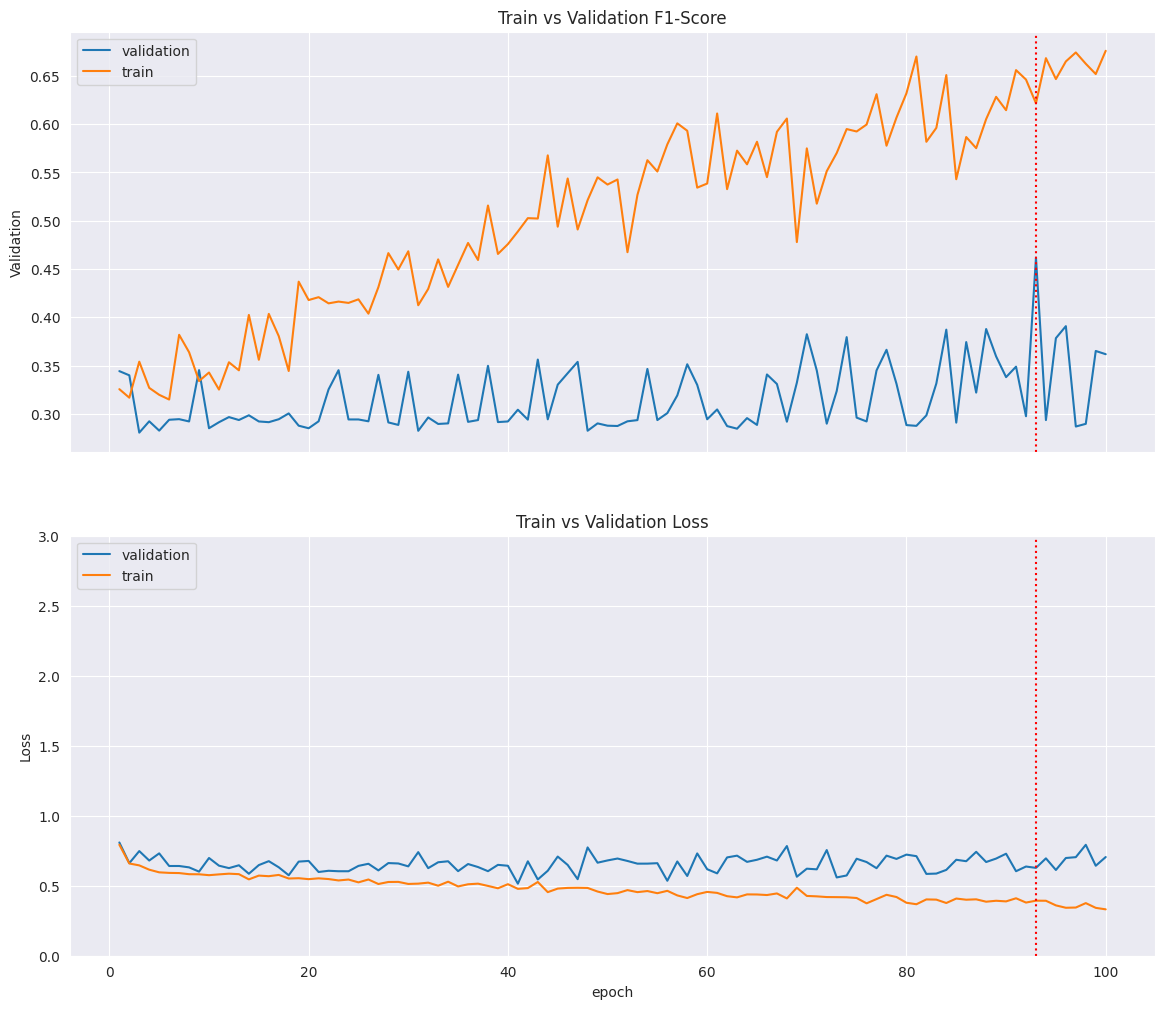

In [21]:
fold = 3

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)

### Fold 4

**
Melhor modelo:
epoch              48.000000
train_f1            0.586305
train_loss          0.424846
validation_f1       0.466958
validation_loss     0.833082
Name: 47, dtype: float64
**



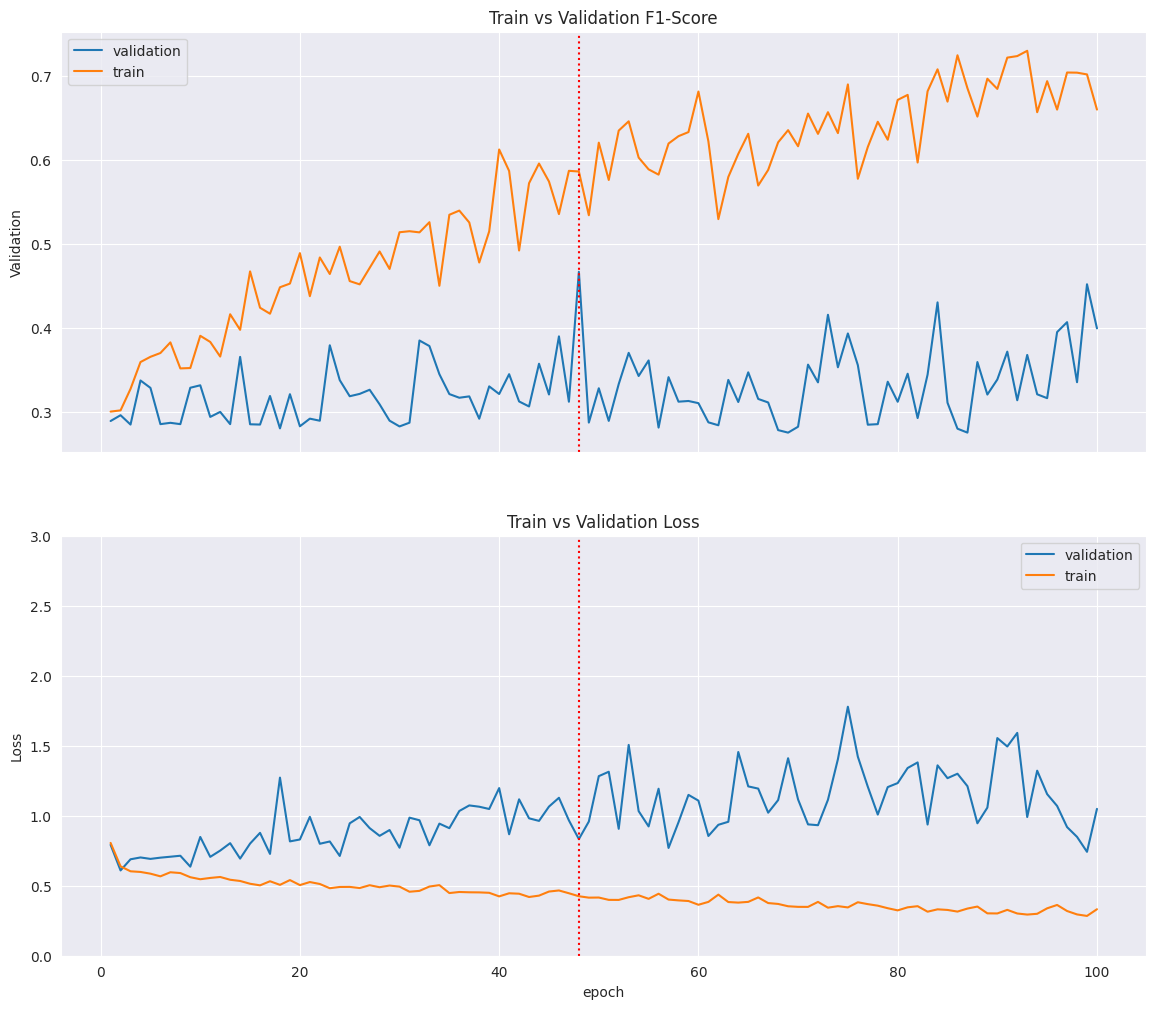

In [23]:
fold = 4

df = pd.read_csv(f"{logs_path}/fold{fold}.csv", sep=",")
plot_training(df)